In [25]:
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox as boxtest
from statsmodels.tsa.stattools import acf, pacf, acovf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA


In [ ]:
## --------------- Monthly Sales Data ------------ ##

In [12]:
sales = pd.read_csv("./monthly-sales-for-a-souvenir-sho.csv")
sales = sales[:len(sales)-1]
sales.columns = ["date_month","y"]
sales["y"] = pd.to_numeric(sales["y"])
sales["y_log"] = np.log(sales["y"])
sales = sales.set_index("date_month")
print(sales.tail())

ts_y = pd.Series(sales["y"], index=sales.index)
ts_log = pd.Series(sales["y_log"], index=sales.index)

                    y      y_log
date_month                      
1993-08      28586.52  10.260691
1993-09      30505.41  10.325659
1993-10      30821.33  10.335962
1993-11      46634.38  10.750093
1993-12     104660.67  11.558479


/usr/local/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


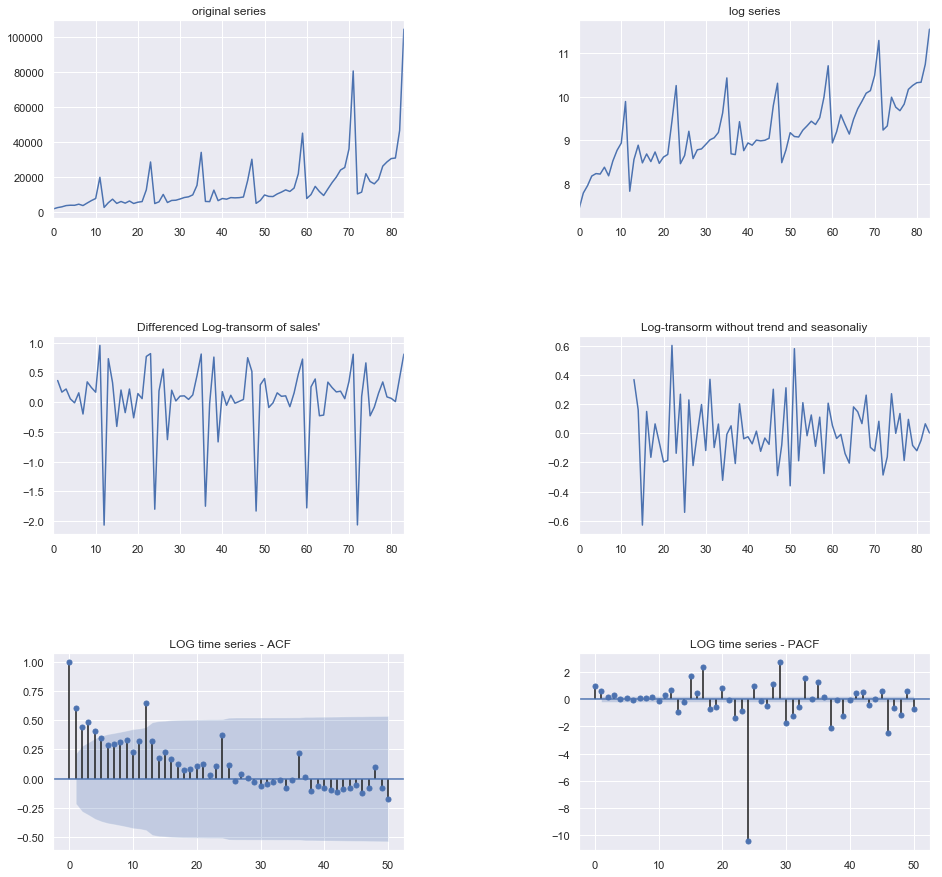

In [24]:
fig = plt.figure()
plt.subplots_adjust(wspace=0.5, hspace=0.6)
gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[0,0])
ax1.set_title("original series")
ax2 = fig.add_subplot(gs[0,1])
ax2.set_title("log series")
ax3 = fig.add_subplot(gs[1,0])
ax3.set_title("Differenced Log-transorm of sales'")

ax4 = fig.add_subplot(gs[1,1])
ax4.set_title("Log-transorm without trend and seasonaliy")

ax5 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])

## original
sns.set(rc={'figure.figsize':(15.7,15.27)})
sns.tsplot(data=ts_y ,ax = ax1)

## after LOG transformation ##
sns.tsplot(data=ts_log, ax = ax2)

sns.tsplot(ts_log.diff(), ax=ax3)
sns.tsplot(ts_log.diff().diff(12), ax=ax4)


## ACF and PACF
plot_acf(ts_log, title = " LOG time series - ACF",ax=ax5, lags =50)
plot_pacf(ts_log,title = "LOG time series - PACF",ax=ax6,lags =50)

plt.show()


In [59]:
## Fit for all combinations of p,q,d,P,Q,D,m
d=1
DD=1
m =12
df = pd.DataFrame(columns=["Model","AIC","BIC","SSE"])
for p in range(2):
    for q in range(2):
        for i in range(2):
            for j in range(2):
                if(p+q+i+j)<10:
                    model = sm.tsa.statespace.SARIMAX(endog=ts_log,order=(p,d,q),seasonal_order=(i,DD,j,m),trend='c',enforce_invertibility=False)
                    results=model.fit()
                    residuals_sse = sum(pow(results.resid,2))
                    model = ",".join(map(str,[p,d,q,i,DD,j,m]))
                    df = df.append({"Model" : model,"AIC" : results.aic, "BIC" : results.bic, "SSE":residuals_sse},ignore_index=True)

df

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-

,Model,AIC,BIC,SSE
0,"0,1,0,0,1,0,12",-9.612917,-5.087557,93.214981
1,"0,1,0,0,1,1,12",-14.099872,-7.311833,93.037276
2,"0,1,0,1,1,0,12",-11.439767,-4.651728,93.075940
3,"0,1,0,1,1,1,12",-15.775120,-6.724401,92.887808
4,"0,1,1,0,1,0,12",-25.965934,-19.177894,92.471037
5,"0,1,1,0,1,1,12",-32.638749,-23.588029,92.249599
6,"0,1,1,1,1,0,12",-30.450253,-21.399534,92.293872
7,"0,1,1,1,1,1,12",-32.199204,-20.885805,92.197772
8,"1,1,0,0,1,0,12",-25.135154,-18.347115,92.490109
9,"1,1,0,0,1,1,12",-33.034018,-23.983299,92.257530


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              y_log   No. Observations:                   84
Model:             SARIMAX(1, 1, 0)x(0, 1, 1, 12)   Log Likelihood                  20.517
Date:                            Sun, 06 Jan 2019   AIC                            -33.034
Time:                                    15:36:18   BIC                            -23.983
Sample:                                01-01-1987   HQIC                           -29.435
                                     - 12-01-1993                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0027      0.015     -0.188      0.851      -0.031       0.026
ar.L1         -0.5021      0.103   

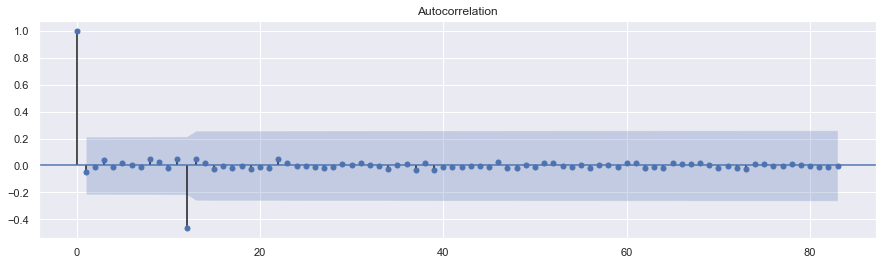

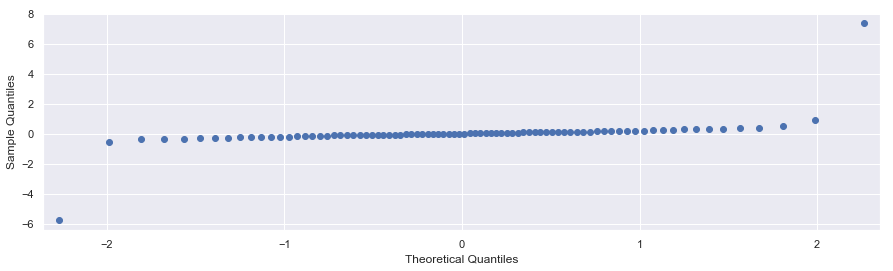

In [73]:
## BEST MODEL with AIC value = -33.03

model=sm.tsa.statespace.SARIMAX(endog=ts_log,order=(1,1,0),seasonal_order=(0,1,1,12),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary()) ## Has less AIC value than other above models

## Residuals PLOT
res = results.resid 
fig2 = plot_acf(res)
fig2.set_size_inches(15,4)
fig1 = sm.qqplot(res)
fig1.set_size_inches(15,4)



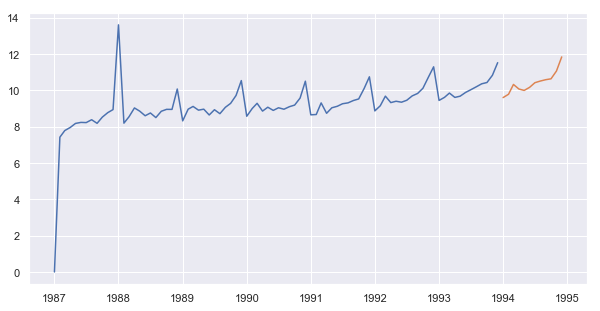

In [80]:
## Forecast
prediction = results.predict()
forcst = results.forecast(12)
fig = plt.figure()
fig.set_size_inches(10,5)
plt.plot(prediction)
plt.plot(forcst)

In [81]:
####### TRY TO GET SAME MODEL FROM AUTO ARIMA ####

In [82]:
# fit stepwise auto-ARIMA

## Parallel
auto_y = pm.auto_arima(ts_log, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

auto_y.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-31.373, BIC=-20.059, Fit time=0.365 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-9.613, BIC=-5.088, Fit time=0.032 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-30.702, BIC=-21.651, Fit time=0.192 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-32.639, BIC=-23.588, Fit time=0.241 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-32.196, BIC=-20.883, Fit time=0.667 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-25.966, BIC=-19.178, Fit time=0.063 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=-14.100, BIC=-7.312, Fit time=0.217 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=-30.697,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   84
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                  20.319
Date:                            Sun, 06 Jan 2019   AIC                            -32.639
Time:                                    15:39:26   BIC                            -23.588
Sample:                                         0   HQIC                           -29.040
                                             - 84                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0018      0.007     -0.267      0.789      -0.015       0.011
ma.L1         -0.5643      0.093     -6.074      0.000      -0.746      -0.382
ma.S.L12      -0.4813      0.151     -3.182      0.001      -0.778      -0.185
sigma2         0.0314      0.006      5.034      0.000       0.019       0.044
===================================================================================
Ljung-Box (Q):                       32.85   Jarque-Bera (JB):                 0.34
Prob(Q):                              0.78   Prob(JB):                         0.84
Heteroskedasticity (H):               0.49   Skew:                             0.03
Prob(H) (two-sided):                  0.08   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
## Next 10 Predictions with confidence interval
preds, conf_int = auto_y.predict(n_periods=10, return_conf_int=True)
for i in range(10):
    print(preds[i],conf_int[i])

9.606228159162828 [9.25878341 9.95367291]
9.770447583603474 [ 9.39145793 10.14943724]
10.32217863444615 [ 9.91407513 10.73028214]
10.071411040555338 [ 9.63613667 10.50668541]
9.989940301900754 [ 9.52909425 10.45078635]
10.162878545757826 [ 9.67780702 10.64795008]
10.424202805069076 [ 9.91605942 10.93234619]
10.519119198985578 [ 9.98890697 11.04933142]
10.594105187541015 [10.04270668 11.14550369]
10.639004182931503 [10.06720385 11.21080451]
